In [1]:
from utils import load_data
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = load_data('data/normalized/')
X = data['X_train_valid']
y = data['y_train_valid'] - 769
print(X.shape)
print(y.shape)

(2115, 1000, 22)
(2115,)


In [10]:
def plot_channels(x, first_n=22):
    xn = np.arange(len(x))
    for i in range(first_n):
        plt.plot(xn, x[:, i])
    plt.show()

In [29]:
avg_channel_0 = np.mean(X[y == 0], axis=(0, 2))
avg_channel_1 = np.mean(X[y == 1], axis=(0, 2))
avg_channel_2 = np.mean(X[y == 2], axis=(0, 2))
avg_channel_3 = np.mean(X[y == 3], axis=(0, 2))

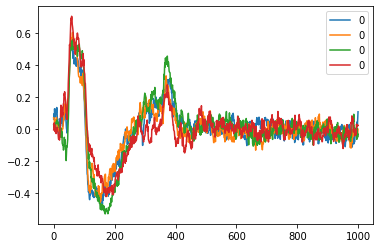

In [30]:
plt.plot(np.arange(1000), avg_channel_0, label='0')
plt.plot(np.arange(1000), avg_channel_1, label='0')
plt.plot(np.arange(1000), avg_channel_2, label='0')
plt.plot(np.arange(1000), avg_channel_3, label='0')
plt.legend(loc='best')
plt.show()

In [31]:
def plot_classes(X, y):
    for i in range(4):
        plt.plot(np.mean(X[y == i], axis=(0, 2)), label=f'{i}')
    plt.legend(loc='best')
    plt.show()

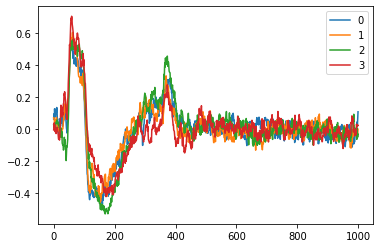

In [32]:
plot_classes(X, y)

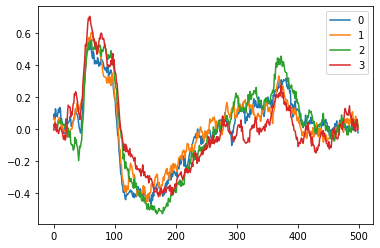

In [33]:
# trimming
X2 = X[:, 0:500, :]
plot_classes(X2, y)

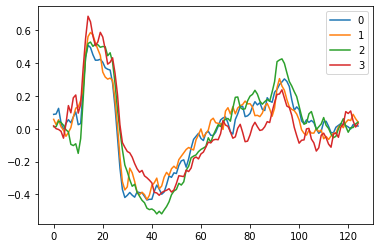

In [41]:
# temporal averaging
wnd = 4
n, seq, nf = X2.shape
X3 = X2.reshape(n, int(seq // wnd), wnd, nf)
X3 = np.mean(X3, axis=2)
plot_classes(X3, y)